In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
circuits=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\circuits.csv")
race=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\races.csv")
result=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\results.csv")
qualifying=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\qualifying.csv")
pit_stops=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\pit_stops.csv")
lap_times=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\lap_times.csv")
drivers=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\drivers.csv")
driver_standings=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\driver_standings.csv")
constructors=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\constructors.csv")
constructors_standings=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\constructor_standings.csv")
constructor_results=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\constructor_results.csv")
seasons=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\seasons.csv")
sprint_results=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\sprint_results.csv")
status=pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\status.csv")


In [3]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [4]:
race.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [5]:
race.isnull().any()

raceId         False
year           False
round          False
circuitId      False
name           False
date           False
time           False
url            False
fp1_date       False
fp1_time       False
fp2_date       False
fp2_time       False
fp3_date       False
fp3_time       False
quali_date     False
quali_time     False
sprint_date    False
sprint_time    False
dtype: bool

In [6]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


In [7]:
race.loc[:, :'url',]

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...


In [8]:
race

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [9]:
race.tail()


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00
1124,1144,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,https://en.wikipedia.org/wiki/2024_Abu_Dhabi_G...,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,\N,\N


In [10]:
race.replace('\\N',"00:00:00",inplace=True)

In [11]:
race.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


In [12]:
race.tail()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,00:00:00,00:00:00
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,00:00:00,00:00:00,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,00:00:00,00:00:00
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,00:00:00,00:00:00,2024-11-30,17:00:00,2024-11-30,13:00:00
1124,1144,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,https://en.wikipedia.org/wiki/2024_Abu_Dhabi_G...,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,00:00:00,00:00:00


In [13]:
result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [14]:
result.isnull().any()

resultId           False
raceId             False
driverId           False
constructorId      False
number             False
grid               False
position           False
positionText       False
positionOrder      False
points             False
laps               False
time               False
milliseconds       False
fastestLap         False
rank               False
fastestLapTime     False
fastestLapSpeed    False
statusId           False
dtype: bool

In [15]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [16]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB


In [17]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,30,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson
858,860,bearman,38,BEA,Oliver,Bearman,2005-05-08,British,http://en.wikipedia.org/wiki/Oliver_Bearman
859,861,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,http://en.wikipedia.org/wiki/Franco_Colapinto


In [18]:
null_percentage = drivers.isnull().mean() * 100
print(null_percentage)

driverId       0.0
driverRef      0.0
number         0.0
code           0.0
forename       0.0
surname        0.0
dob            0.0
nationality    0.0
url            0.0
dtype: float64


In [19]:
drivers.replace('\\N',np.nan,inplace=True)

In [20]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,30,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson
858,860,bearman,38,BEA,Oliver,Bearman,2005-05-08,British,http://en.wikipedia.org/wiki/Oliver_Bearman
859,861,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,http://en.wikipedia.org/wiki/Franco_Colapinto


In [21]:
drivers.isnull().any()

driverId       False
driverRef      False
number          True
code            True
forename       False
surname        False
dob            False
nationality    False
url            False
dtype: bool

In [22]:
drivers['number'].isnull().sum()

np.int64(802)

In [23]:
drivers.drop(columns=['number'],inplace=True)

In [24]:
drivers

,driverId,driverRef,code,forename,surname,dob,nationality,url
0,1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...
856,858,sargeant,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson
858,860,bearman,BEA,Oliver,Bearman,2005-05-08,British,http://en.wikipedia.org/wiki/Oliver_Bearman
859,861,colapinto,COL,Franco,Colapinto,2003-05-27,Argentinian,http://en.wikipedia.org/wiki/Franco_Colapinto


In [25]:
drivers['driverId'].isnull().sum()

np.int64(0)

In [26]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [27]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


In [28]:
s1=status.groupby('status')['statusId'].median().reset_index()

In [29]:
s1

,status,statusId
0,+1 Lap,11.0
1,+10 Laps,88.0
2,+11 Laps,45.0
3,+12 Laps,55.0
4,+13 Laps,53.0
...,...,...
134,Wheel,36.0
135,Wheel bearing,67.0
136,Wheel nut,61.0
137,Wheel rim,46.0


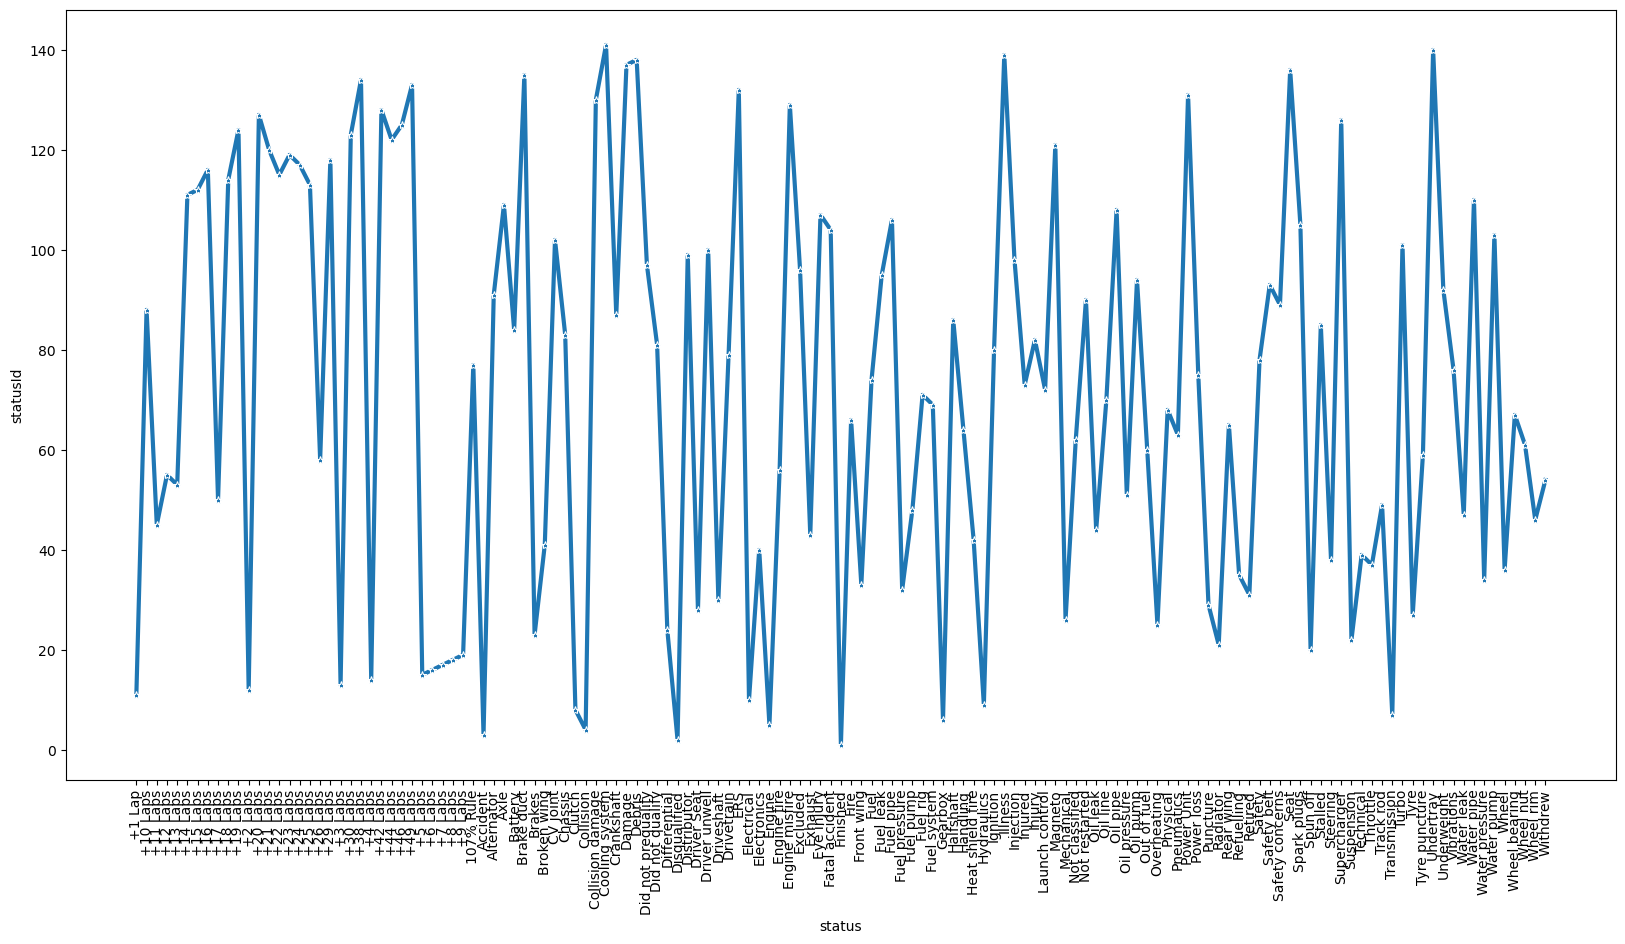

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(x='status',y='statusId',data=s1,marker='*',lw=3)
plt.xticks(rotation=90)
plt.show()

In [31]:
sprint_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,1143,859,215,30,10,16,16,16,0,19,+34.356,1657366,18,1:25.762,1
356,357,1143,852,215,22,16,17,17,17,0,19,+35.102,1658112,17,1:25.838,1
357,358,1143,861,3,43,0,18,18,18,0,19,+35.639,1658649,18,1:25.599,1
358,359,1143,855,15,24,18,19,19,19,0,19,+1:11.436,1694446,19,1:25.051,1


In [32]:
sprint_results.isnull().any()

resultId          False
raceId            False
driverId          False
constructorId     False
number            False
grid              False
position          False
positionText      False
positionOrder     False
points            False
laps              False
time              False
milliseconds      False
fastestLap        False
fastestLapTime    False
statusId          False
dtype: bool

In [33]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [34]:
qualifying.tail()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
10489,10547,1144,848,3,23,16,1:23.821,\N,\N
10490,10548,1144,855,15,24,17,1:23.880,\N,\N
10491,10549,1144,1,131,44,18,1:23.887,\N,\N
10492,10550,1144,861,3,43,19,1:23.912,\N,\N
10493,10551,1144,862,214,61,20,1:24.105,\N,\N


In [35]:
qualifying.isnull().any()

qualifyId        False
raceId           False
driverId         False
constructorId    False
number           False
position         False
q1               False
q2                True
q3                True
dtype: bool

In [36]:
qualifying.fillna(qualifying['q2']=='00:00:00')

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
10489,10547,1144,848,3,23,16,1:23.821,\N,\N
10490,10548,1144,855,15,24,17,1:23.880,\N,\N
10491,10549,1144,1,131,44,18,1:23.887,\N,\N
10492,10550,1144,861,3,43,19,1:23.912,\N,\N


In [37]:
qualifying['q2'] = qualifying['q2'].replace('\\N', '00:00:00')


In [38]:
qualifying.isnull().any()

qualifyId        False
raceId           False
driverId         False
constructorId    False
number           False
position         False
q1               False
q2                True
q3                True
dtype: bool

In [39]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10494 entries, 0 to 10493
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      10494 non-null  int64 
 1   raceId         10494 non-null  int64 
 2   driverId       10494 non-null  int64 
 3   constructorId  10494 non-null  int64 
 4   number         10494 non-null  int64 
 5   position       10494 non-null  int64 
 6   q1             10494 non-null  object
 7   q2             10472 non-null  object
 8   q3             10448 non-null  object
dtypes: int64(6), object(3)
memory usage: 738.0+ KB


In [40]:
qualifying.tail()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
10489,10547,1144,848,3,23,16,1:23.821,00:00:00,\N
10490,10548,1144,855,15,24,17,1:23.880,00:00:00,\N
10491,10549,1144,1,131,44,18,1:23.887,00:00:00,\N
10492,10550,1144,861,3,43,19,1:23.912,00:00:00,\N
10493,10551,1144,862,214,61,20,1:24.105,00:00:00,\N


In [41]:
qualifying['q3'] = qualifying['q3'].replace('\\N', '00:00:00')


In [42]:
qualifying.tail()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
10489,10547,1144,848,3,23,16,1:23.821,00:00:00,00:00:00
10490,10548,1144,855,15,24,17,1:23.880,00:00:00,00:00:00
10491,10549,1144,1,131,44,18,1:23.887,00:00:00,00:00:00
10492,10550,1144,861,3,43,19,1:23.912,00:00:00,00:00:00
10493,10551,1144,862,214,61,20,1:24.105,00:00:00,00:00:00


In [43]:
drivers

,driverId,driverRef,code,forename,surname,dob,nationality,url
0,1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...
856,858,sargeant,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson
858,860,bearman,BEA,Oliver,Bearman,2005-05-08,British,http://en.wikipedia.org/wiki/Oliver_Bearman
859,861,colapinto,COL,Franco,Colapinto,2003-05-27,Argentinian,http://en.wikipedia.org/wiki/Franco_Colapinto


In [44]:
d1=drivers['nationality'].value_counts()

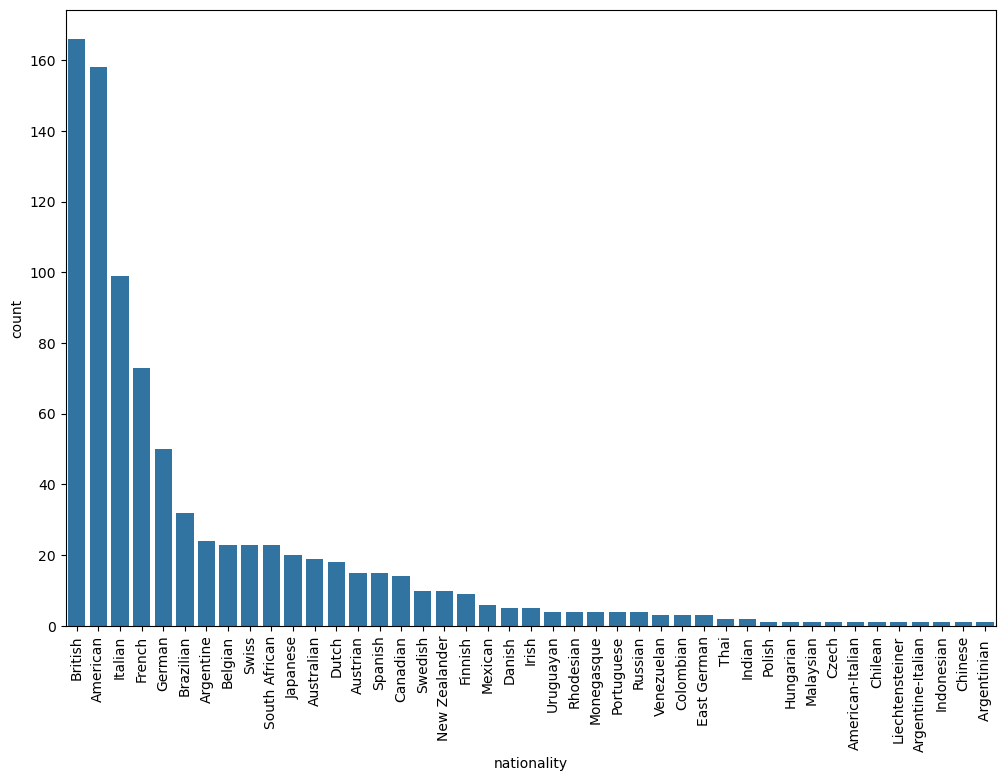

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(data=drivers, x='nationality', order=drivers['nationality'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [46]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [47]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34863 entries, 0 to 34862
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34863 non-null  int64  
 1   raceId             34863 non-null  int64  
 2   driverId           34863 non-null  int64  
 3   points             34863 non-null  float64
 4   position           34863 non-null  int64  
 5   positionText       34863 non-null  object 
 6   wins               34863 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ MB


In [48]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [49]:
driver_standings.drop('positionText',axis=1)

,driverStandingsId,raceId,driverId,points,position,wins
0,1,18,1,10.0,1,1
1,2,18,2,8.0,2,0
2,3,18,3,6.0,3,0
3,4,18,4,5.0,4,0
4,5,18,5,4.0,5,0
...,...,...,...,...,...,...
34858,73266,1144,858,0.0,23,0
34859,73267,1144,860,7.0,18,0
34860,73268,1144,861,5.0,19,0
34861,73269,1144,859,4.0,21,0


In [50]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [51]:
c1=constructors.groupby('nationality')['name'].value_counts().reset_index()

In [52]:
c1

,nationality,name,count
0,American,Adams,1
1,American,Bromme,1
2,American,Christensen,1
3,American,Deidt,1
4,American,Del Roy,1
...,...,...,...
207,Swiss,Alfa Romeo,1
208,Swiss,Apollon,1
209,Swiss,Bellasi,1
210,Swiss,MBM,1


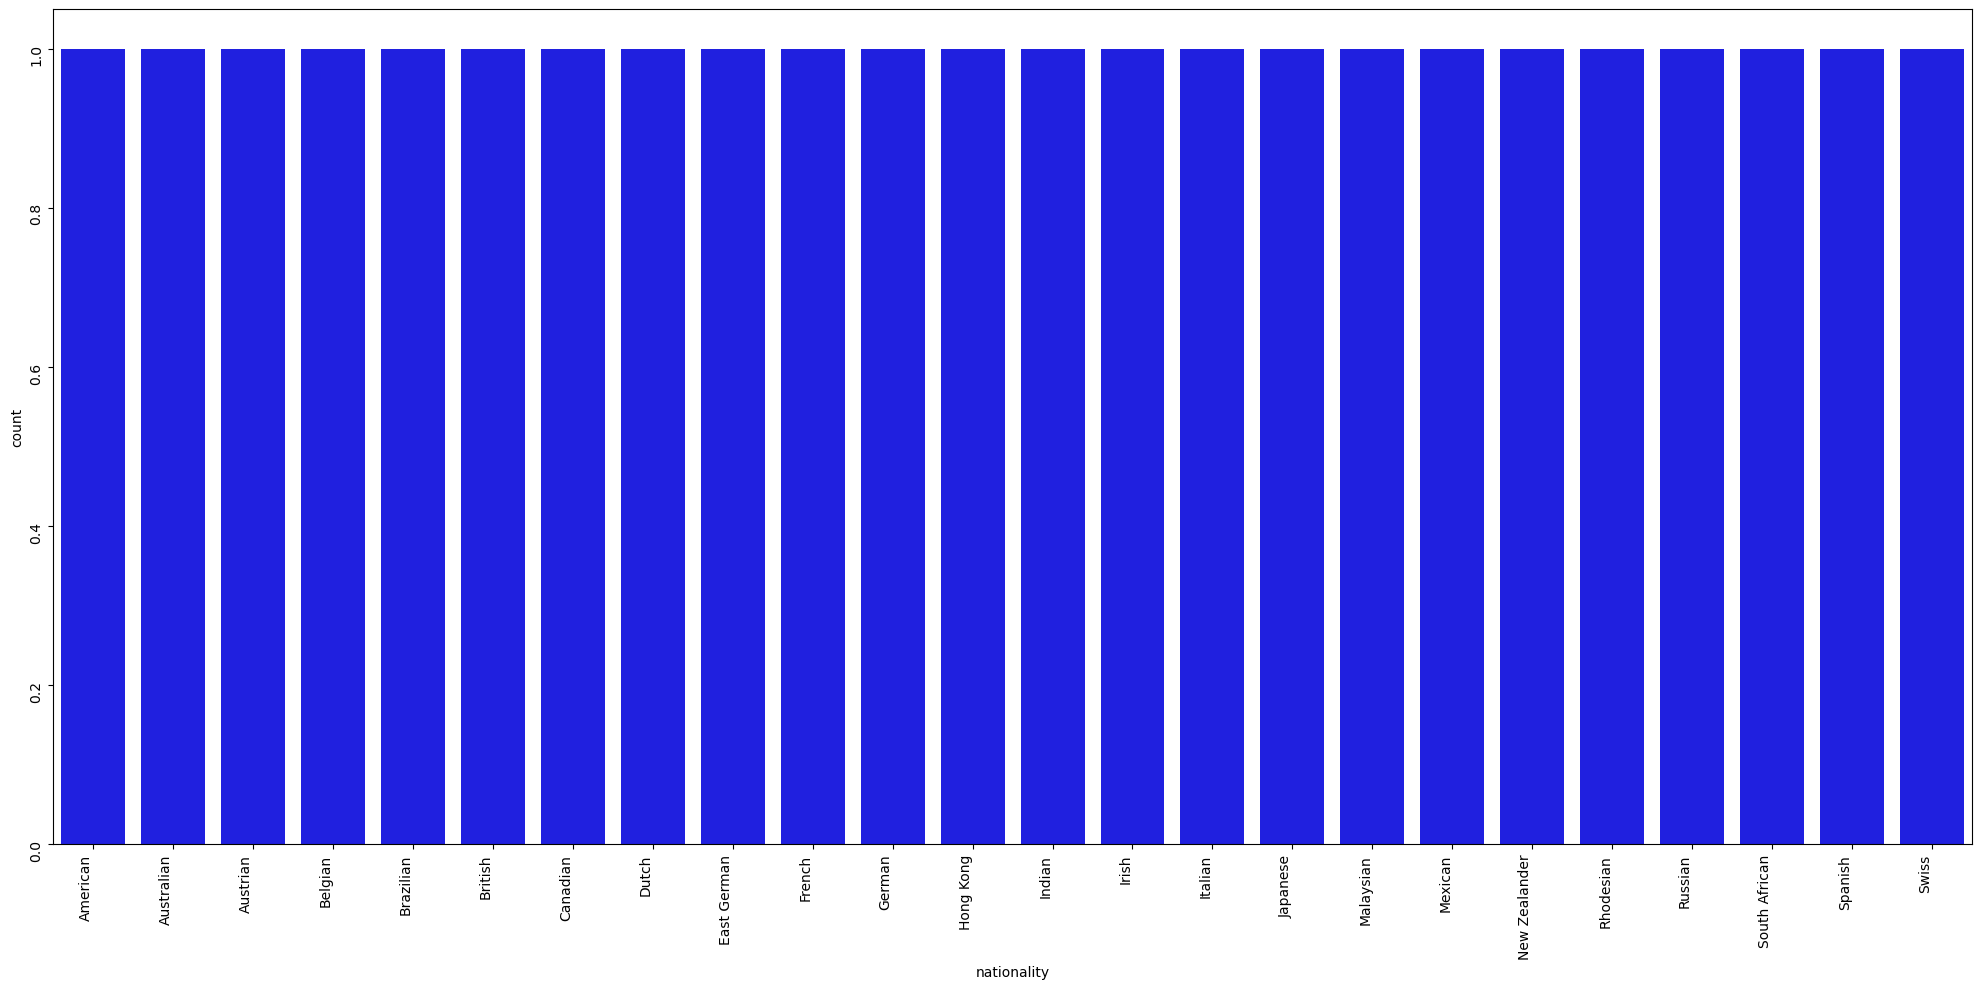

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(x='nationality',y='count',data=c1,color='blue')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.yticks(rotation=90)
plt.show()

In [54]:
seasons

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...
...,...,...
70,2020,http://en.wikipedia.org/wiki/2020_Formula_One_...
71,2021,http://en.wikipedia.org/wiki/2021_Formula_One_...
72,2022,http://en.wikipedia.org/wiki/2022_Formula_One_...
73,2023,http://en.wikipedia.org/wiki/2023_Formula_One_...


In [55]:
seasons['year'].value_counts()

year
2009    1
2008    1
2007    1
2006    1
2005    1
       ..
2020    1
2021    1
2022    1
2023    1
2024    1
Name: count, Length: 75, dtype: int64

In [56]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [57]:
lap_times.isnull().any()

raceId          False
driverId        False
lap             False
position        False
time            False
milliseconds    False
dtype: bool

In [59]:
lap_times.sort_values(by='time',ascending=True)

,raceId,driverId,lap,position,time,milliseconds
488409,1046,847,80,14,0:55.404,55404
488412,1046,847,83,12,0:56.319,56319
488404,1046,847,75,2,0:56.393,56393
488405,1046,847,76,2,0:56.442,56442
488413,1046,847,84,11,0:56.499,56499
...,...,...,...,...,...,...
532962,1092,839,3,4,9:13.288,553288
532878,1092,830,3,1,9:13.758,553758
540824,1100,856,54,16,9:18.552,558552
187749,167,23,10,18,9:24.047,564047


In [60]:
lap_times.sort_values(by='time',ascending=False)

,raceId,driverId,lap,position,time,milliseconds
277689,83,13,43,16,9:45.712,585712
187749,167,23,10,18,9:24.047,564047
540824,1100,856,54,16,9:18.552,558552
532878,1092,830,3,1,9:13.758,553758
532962,1092,839,3,4,9:13.288,553288
...,...,...,...,...,...,...
488413,1046,847,84,11,0:56.499,56499
488405,1046,847,76,2,0:56.442,56442
488404,1046,847,75,2,0:56.393,56393
488412,1046,847,83,12,0:56.319,56319


In [63]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [67]:
constructor_results.drop('status',axis=1,inplace=True)

In [68]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points
0,1,18,1,14.0
1,2,18,2,8.0
2,3,18,3,9.0
3,4,18,4,5.0
4,5,18,5,2.0


In [70]:
constructors_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [71]:
constructors_standings.sort_values(by='wins',ascending=False)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
13141,28703,1120,9,860.0,1,1,21
13131,28693,1119,9,822.0,1,1,20
11686,26722,968,131,765.0,1,1,19
13121,28683,1118,9,782.0,1,1,19
11655,26711,967,131,722.0,1,1,18
...,...,...,...,...,...,...,...
8,9,19,3,9.0,4,4,0
7,8,19,2,19.0,2,2,0
5,6,18,6,1.0,6,6,0
4,5,18,5,2.0,5,5,0


In [72]:
constructors_standings.sort_values(by='wins',ascending=True)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
31,32,21,4,6.0,7,7,0
11581,26573,958,10,74.0,5,5,0
18,19,20,2,30.0,1,1,0
19,20,20,3,10.0,4,4,0
20,21,20,4,6.0,6,6,0
...,...,...,...,...,...,...,...
11655,26711,967,131,722.0,1,1,18
13121,28683,1118,9,782.0,1,1,19
11686,26722,968,131,765.0,1,1,19
13131,28693,1119,9,822.0,1,1,20
